In [8]:
#Cargar Librerias 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Libreria ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
#Lectura de los datos cargados

Datos = pd.read_csv('C:/Users/Nicolas/Desktop/archive(1)/heart_cleveland_upload.csv')

In [18]:
#Lectura de los datos 

Datos.head(40)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [20]:
#Descripcion de los datos

Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Datos Faltantes y Atipicos')

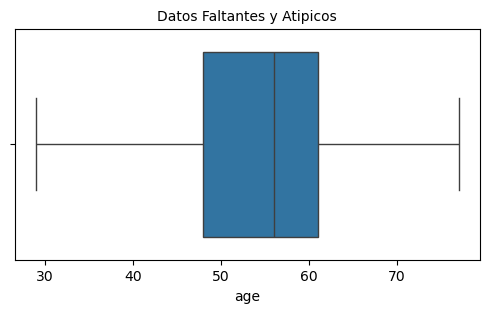

In [28]:
#Identificar datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos ['age'])
plt.title('Datos Faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Datos Faltantes y Atipicos')

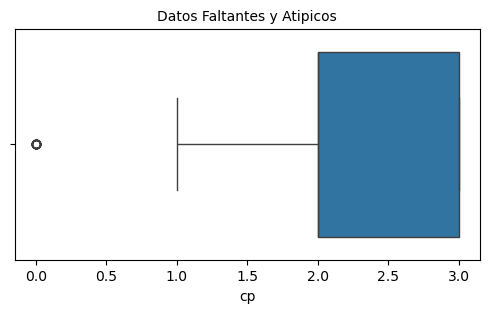

In [32]:
#Identificar datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos ['cp'])
plt.title('Datos Faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Datos Faltantes y Atipicos')

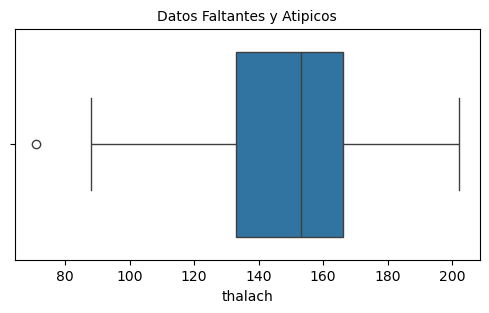

In [34]:
#Identificar datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos ['thalach'])
plt.title('Datos Faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Datos Faltantes y Atipicos')

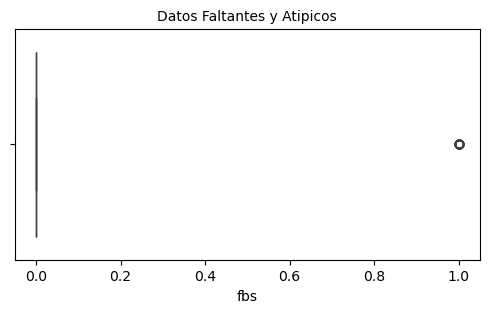

In [36]:
#Identificar datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos ['fbs'])
plt.title('Datos Faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Datos Faltantes y Atipicos')

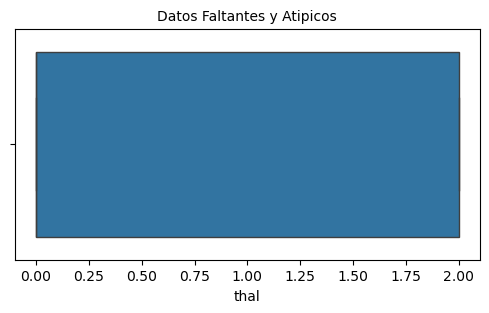

In [40]:
#Identificar datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos ['thal'])
plt.title('Datos Faltantes y Atipicos', fontsize=10)

In [49]:
#Revision Datos Faltantes

print("Cantidad de Registros con cero en Flujo de Sangre: ",Datos['thal'].isin([0]).sum())

Cantidad de Registros con cero en Flujo de Sangre:  164


In [51]:
#Remplazar los ceros con el valor (promedio) de la columna

Datos['thal']=Datos['thal'].replace(0,Datos['thal'].max())

In [53]:
#Revision nuevamente Datos Faltantes

print("Cantidad de Registros con cero en Flujo de Sangre: ",Datos['thal'].isin([0]).sum())

Cantidad de Registros con cero en Flujo de Sangre:  0


Text(0.5, 1.0, 'Datos Atipicos')

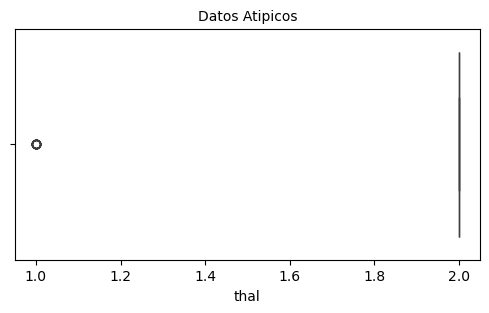

In [55]:
#Identificar datos Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos ['thal'])
plt.title('Datos Atipicos', fontsize=10)

Text(0.5, 1.0, 'Datos Atipicos')

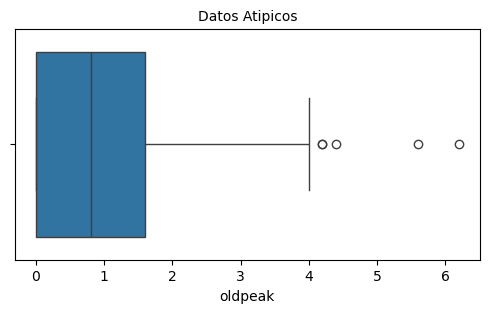

In [57]:
#Identificar datos Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos ['oldpeak'])
plt.title('Datos Atipicos', fontsize=10)

Text(0.5, 1.0, 'Datos Atipicos')

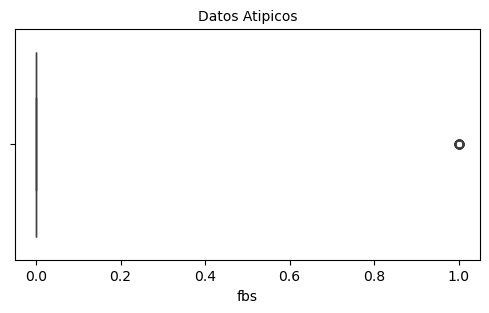

In [59]:
#Identificar datos Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos ['fbs'])
plt.title('Datos Atipicos', fontsize=10)

In [63]:
#Conteo Valores atipicos OLDPEAK

nivel_minimo=0.0
nivel_maximo=4.0
Total_Atipicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print("Total Datos Atipicos es {}".format(Total_Atipicos))

Total Datos Atipicos es 5


In [65]:
#Filtrar valores atipicos

Datos=Datos[(Datos['oldpeak']<nivel_maximo)&(Datos['oldpeak']>nivel_minimo)]

In [67]:
#Validar valores atipicos

Total_Atipicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print("Total Datos Atipicos es {}".format(Total_Atipicos))

Total Datos Atipicos es 0


In [79]:
#Conteo Valores atipicos THALACH

nivel_minimo=80
nivel_maximo=220
Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("Total Datos Atipicos es {}".format(Total_Atipicos))

Total Datos Atipicos es 0


In [75]:
Datos=Datos[(Datos['thalach']<nivel_maximo)&(Datos['thalach']>nivel_minimo)]

In [77]:
Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("Total Datos Atipicos es {}".format(Total_Atipicos))

Total Datos Atipicos es 0


In [81]:
#Total personas con enfermedad cardiaca

Datos['condition'].value_counts()

condition
1    103
0     89
Name: count, dtype: int64

In [83]:
#Porcentaje para trabajar en Train y Test

X = Datos.drop('condition', axis=1)
Y = Datos['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [85]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
17    51    1   0       125   213    0        2      125      1      1.4   
53    48    1   1       130   245    0        2      180      0      0.2   
245   54    1   3       120   188    0        0      113      0      1.4   
217   58    1   3       146   218    0        0      105      0      2.0   
130   48    0   2       130   275    0        0      139      0      0.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
222   58    1   3       100   234    0        0      156      0      0.1   
6     63    1   0       145   233    1        2      150      0      2.3   
293   39    1   3       118   219    0        0      140      0      1.2   
174   64    1   3       120   246    0        2       96      1      2.2   
159   68    1   3       144   193    1        0      141      0      3.4   

     slope  ca  thal  
17       0   1     2  
53       1   0     2  
245      1   1    

In [87]:
print (X_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
188   62    0   3       140   394    0        2      157      0      1.2   
168   66    1   3       112   212    0        2      132      1      0.1   
117   52    1   2       172   199    1        0      162      0      0.5   
172   65    1   3       120   177    0        0      140      0      0.4   
74    70    1   2       160   269    0        0      112      1      2.9   
171   65    1   3       135   254    0        2      127      0      2.8   
208   59    1   3       110   239    0        2      142      1      1.2   
193   61    0   3       145   307    0        2      146      1      1.0   
190   62    0   3       150   244    0        0      154      1      1.4   
153   37    1   2       130   250    0        0      187      0      3.5   
226   57    1   3       152   274    0        0       88      1      1.2   
196   61    1   3       140   207    0        2      138      1      1.9   
92    61    

In [89]:
#Modelo de regresion logistica

mdr = LogisticRegression(solver = "liblinear")
mdr.fit (X_train, Y_train)

#Creacion modelo de prediccion

Prediccion = mdr.predict(X_test)

In [91]:
X_test.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
188,62,0,3,140,394,0,2,157,0,1.2,1,0,2
168,66,1,3,112,212,0,2,132,1,0.1,0,1,2
117,52,1,2,172,199,1,0,162,0,0.5,0,0,2
172,65,1,3,120,177,0,0,140,0,0.4,0,0,2
74,70,1,2,160,269,0,0,112,1,2.9,1,1,2
171,65,1,3,135,254,0,2,127,0,2.8,1,1,2
208,59,1,3,110,239,0,2,142,1,1.2,1,1,2
193,61,0,3,145,307,0,2,146,1,1.0,1,0,2
190,62,0,3,150,244,0,0,154,1,1.4,1,0,2
153,37,1,2,130,250,0,0,187,0,3.5,2,0,2


In [93]:
print (Prediccion)

[0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1
 1 0 1 0 0 1 0 0 0 0 1]


In [95]:
#Desempeño del modelo

print (classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71        22
           1       0.76      0.73      0.75        26

    accuracy                           0.73        48
   macro avg       0.73      0.73      0.73        48
weighted avg       0.73      0.73      0.73        48



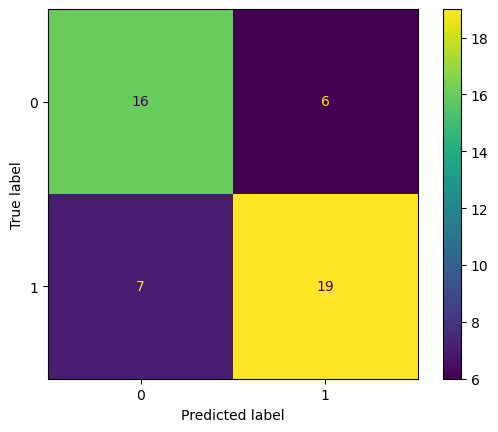

In [97]:
#Matrix de Confusion del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

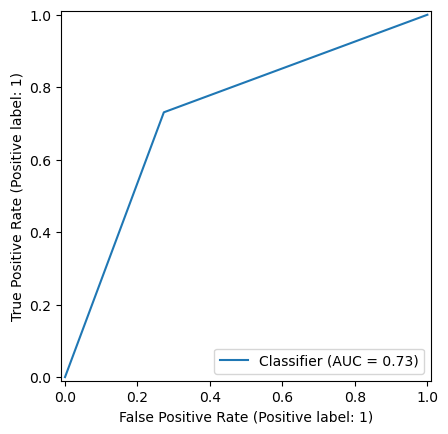

In [99]:
#Curva de precision del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()